In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter, defaultdict
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [10]:
# Function to read .csv database and convert to variables.

def read_csv():
    x = []
    y = []
    z = []
    players = []
    x_label = "Average Placement"
    y_label = "Tournaments Played"
    z_label = "Tournaments Topped"
    with open('3dplayerDB.csv', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        header = 0
        for row in reader:
            if header == 0:
                header +=1
            else:
                x.append(float(row[1]) / float(row[2]))
                y.append(float(row[2]))
                z.append(float(row[3]))
                players.append(row[0])
    return x, y, z, x_label, y_label, z_label, players

In [11]:
# Assign values to variables

x, y, z, x_label, y_label, z_label, players = read_csv()

In [12]:
# Convert our (x,y,z) to a triplet array structure

X = np.vstack((x, y, z)).T

In [13]:
# Print header of our array

X

array([[ 13.  ,   2.  ,   1.  ],
       [ 21.25,   4.  ,   1.  ],
       [  3.  ,   1.  ,   1.  ],
       ...,
       [513.  ,   1.  ,   0.  ],
       [513.  ,   1.  ,   0.  ],
       [513.  ,   1.  ,   0.  ]])

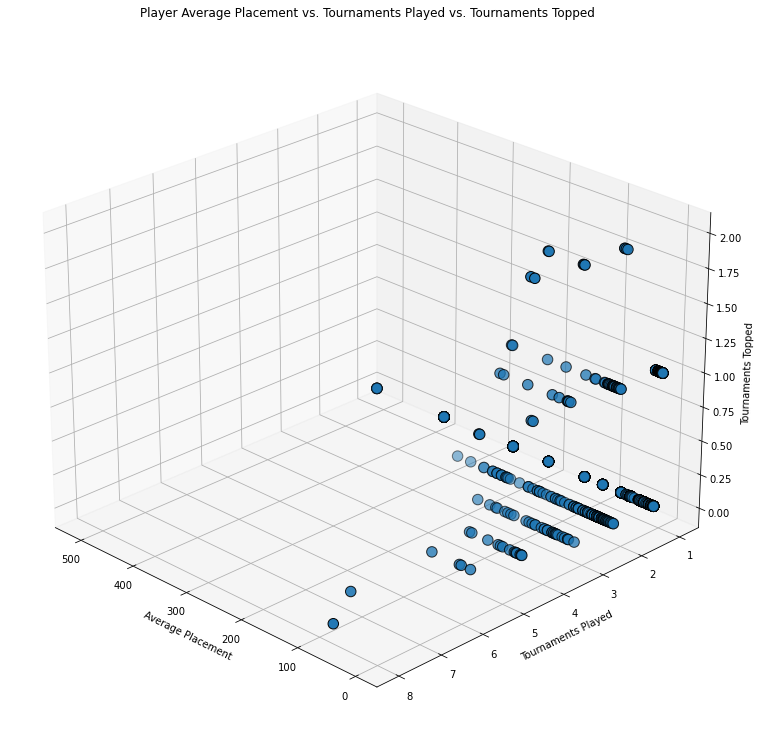

In [68]:
# Draw unclustered graph

# Configure plot
fig = plt.figure(fignum, figsize=(10, 10))
ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=25, azim=135, auto_add_to_figure=False)
fig.add_axes(ax)

# Add information to plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor="k", s=110)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)
ax.set_title("Player Average Placement vs. Tournaments Played vs. Tournaments Topped")
ax.dist = 10

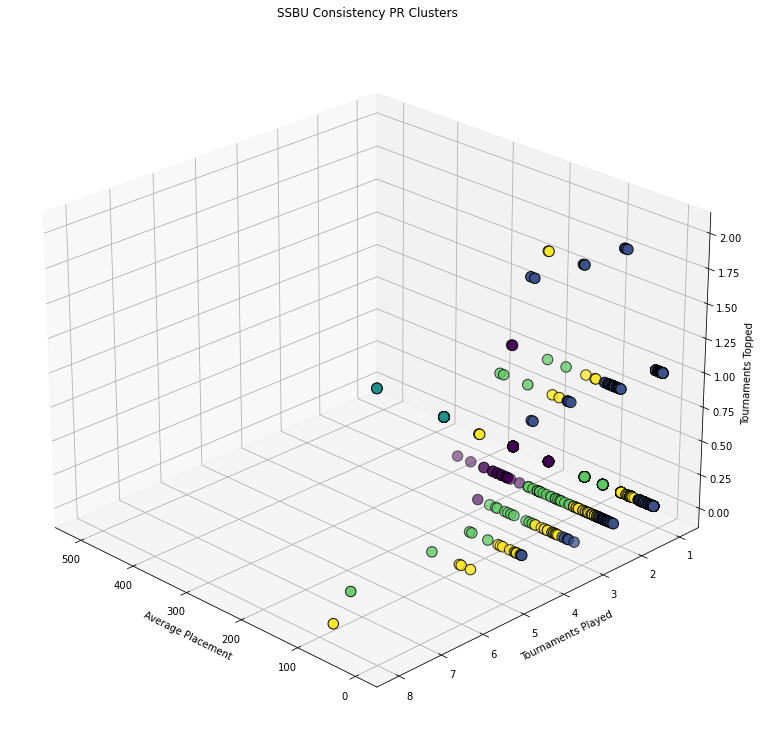

In [72]:
# Define amount of clusters (tiers)
est = KMeans(n_clusters=5)

# Configure plot
fig = plt.figure(fignum, figsize=(10, 10))
ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=25, azim=135, auto_add_to_figure=False)
fig.add_axes(ax)

# Run K-Means Clustering
est.fit(X)
labels = est.labels_

# Add information to plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), edgecolor="k", s=110)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)
ax.set_title("SSBU Consistency PR Clusters")
ax.dist = 10

In [76]:
# Prepare each tier with information

tiers = {}
n = 0
for item in labels:
    if item in tiers:
        tiers[item].append(X[n])
    else:
        tiers[item] = [X[n]]
    n +=1

In [82]:
# Print out tiers
for item in tiers:
    print("Tier ", item)
    for i in tiers[item]:
        print(i)

Tier  1
[13.  2.  1.]
[21.25  4.    1.  ]
[3. 1. 1.]
[22.75  4.    2.  ]
[5. 1. 1.]
[7. 1. 1.]
[20.  2.  1.]
[9. 2. 1.]
[9. 1. 0.]
[9. 1. 0.]
[6.5 2.  1. ]
[13.  1.  0.]
[13.  1.  0.]
[13.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  2.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[33.  1.  0.]
[1. 1. 1.]
[2. 1. 1.]
[3. 1. 1.]
[4. 1. 1.]
[5. 1. 1.]
[5. 1. 1.]
[7. 1. 1.]
[7. 1. 1.]
[9. 1. 0.]
[9. 1. 0.]
[9. 1. 0.]
[9. 1. 0.]
[13.  1.  0.]
[13.  1.  0.]
[13.  1.  0.]
[13.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[17.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.]
[25.  1.  0.

[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[49.  3.  0.]
[49.  1.  0.]
[49.  1.  0.]
[41.  2.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  2.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[81.  2.  0.]
[65.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[57.  2.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[41.  2.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[49.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  1.  0.]
[65.  